# This jupyter notebook is prepared by Justin Mazor.

In [1]:
%config Completer.use_jedi = False

# 1. Load Data and perform basic EDA 

## import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
import sklearn

## import the data to a dataframe and show the count of rows and columns

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/jmazor/Machine-A3/main/hrdata2.csv')
print(df.shape)

(8955, 15)


## Show the top 5 and last 5 rows

In [4]:
print(df)

      Unnamed: 0  enrollee_id      city  city_development_index  gender  \
0              1        29725   city_40                   0.776    Male   
1              4          666  city_162                   0.767    Male   
2              7          402   city_46                   0.762    Male   
3              8        27107  city_103                   0.920    Male   
4             11        23853  city_103                   0.920    Male   
...          ...          ...       ...                     ...     ...   
8950       19147        21319   city_21                   0.624    Male   
8951       19149          251  city_103                   0.920    Male   
8952       19150        32313  city_160                   0.920  Female   
8953       19152        29754  city_103                   0.920  Female   
8954       19155        24576  city_103                   0.920    Male   

          relevent_experience enrolled_university education_level  \
0      No relevent experience 

## Show how many columns have null values

Presence of Null Values: False


<AxesSubplot:>

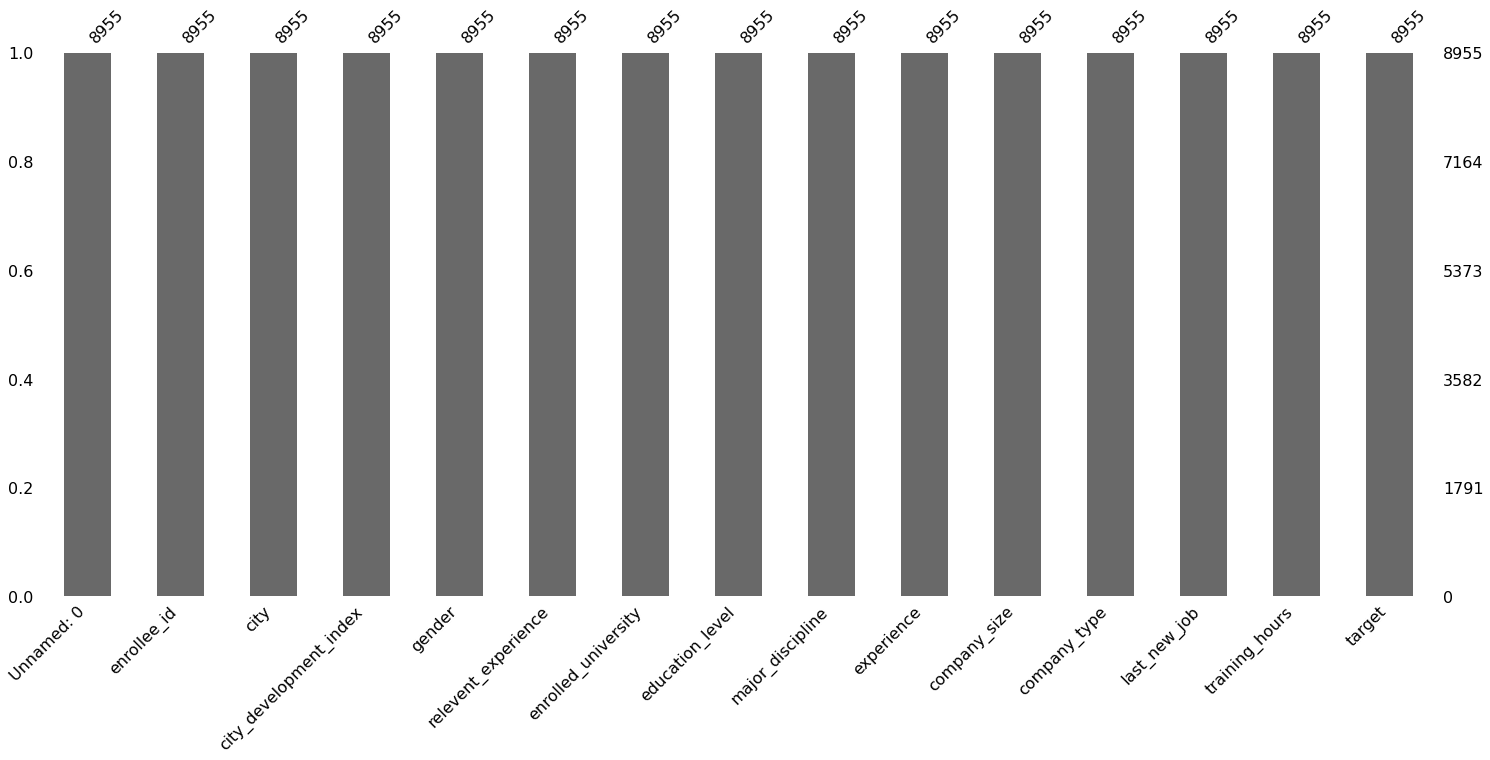

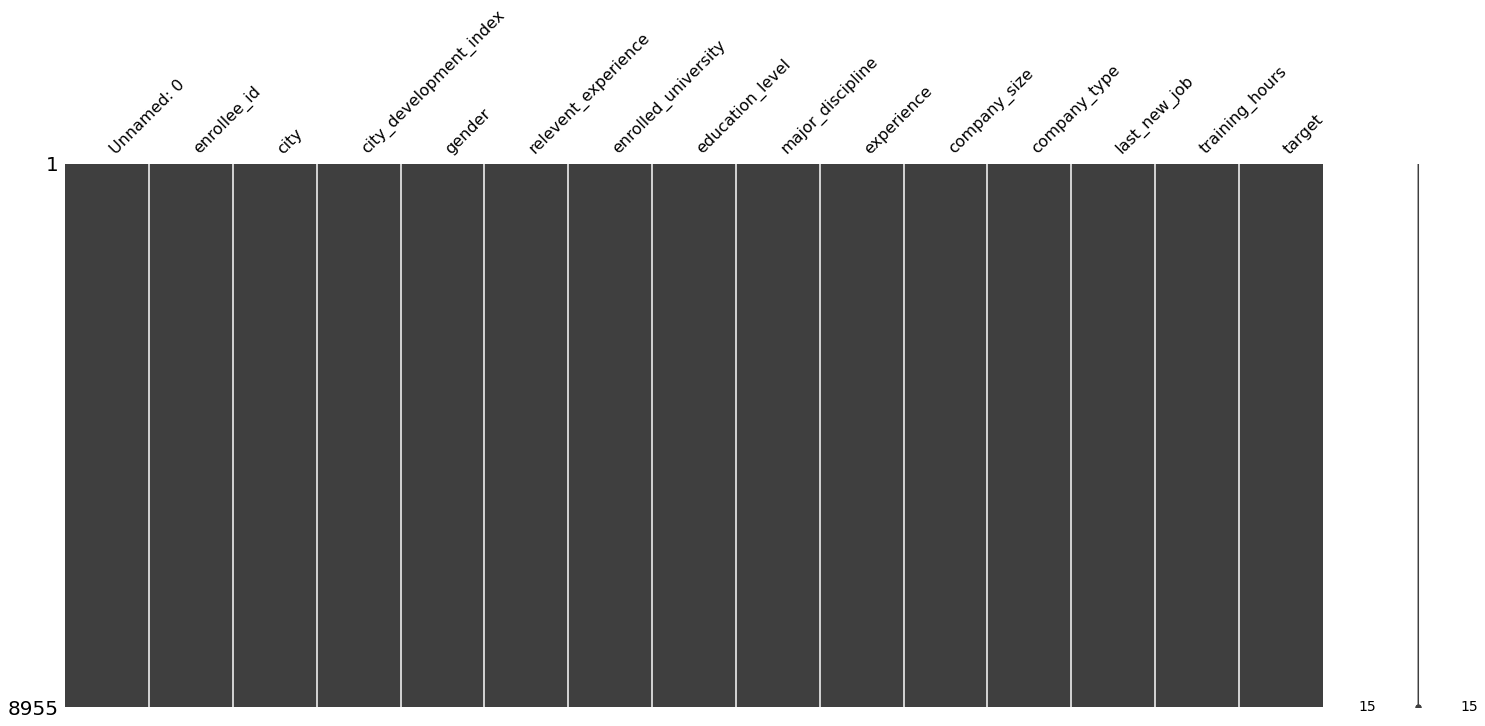

In [5]:
print("Presence of Null Values: "+ str(df.isnull().values.any()))
msno.bar(df)
msno.matrix(df)

## Plot the count of target
# Make Better

<AxesSubplot:>

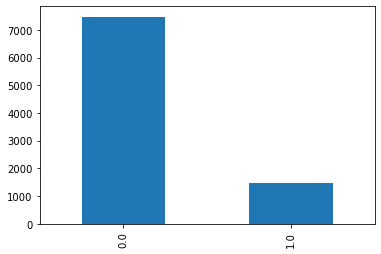

In [6]:
#plt.bar(['0', '1'], df['target'].value_counts())
df['target'].value_counts().plot.bar()

## Discuss its imbalances and probably issues and solutions

Many more 0 targets than 1

# 2. Feature Selection and Pre-processing 

## Preprocessing City: 

### Plot #of records per city so that the highest city counts are shown in descending order

<AxesSubplot:>

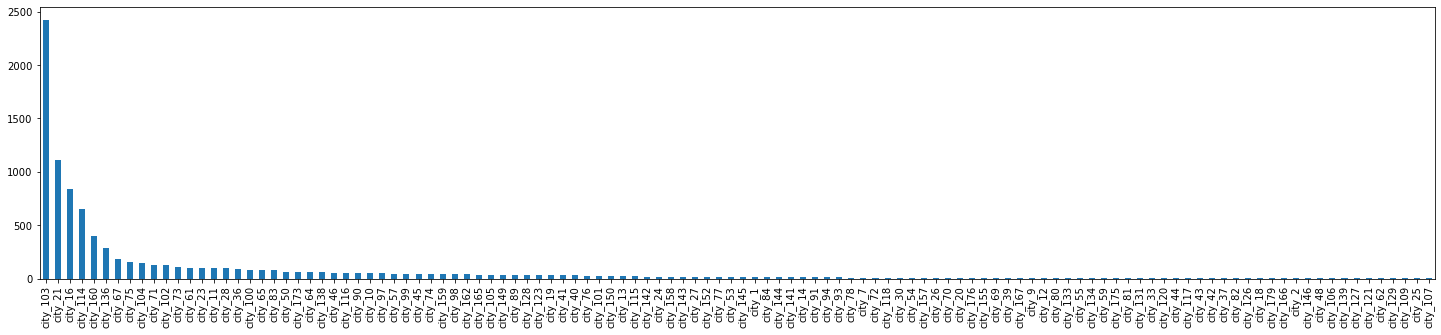

In [7]:
plt.figure(figsize = (25,5))
df['city'].value_counts().plot.bar()

### How many rows belong to the top 4 cities in total and how many for the remaining?

In [8]:
print("Top 4 Cities row count: " + str(df['city'].value_counts().head(4).sum(axis=0)))
print("Remaning Cities row count:", end=' ')
print(df['city'].value_counts().drop((df['city'].value_counts().head(4)).index).sum(axis=0))

Top 4 Cities row count: 5021
Remaning Cities row count: 3934


### Replace the city name with city_others if the city name is not within the top 4 city names.

In [9]:
df.loc[~df['city'].isin(df['city'].value_counts().head(4).index), 'city'] = 'city_others'

### Show some sample data that the records have changed appropriately
# WHat?

city_others    3934
city_103       2426
city_21        1111
city_16         836
city_114        648
Name: city, dtype: int64
6486       city_103
3042    city_others
8400       city_103
1486    city_others
2863    city_others
8223        city_16
5494    city_others
4141        city_21
326         city_21
6480    city_others
Name: city, dtype: object


<AxesSubplot:>

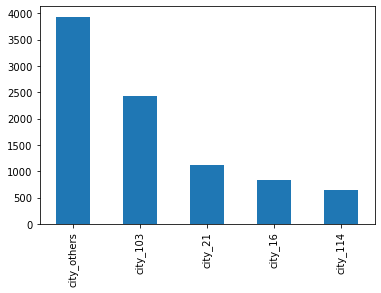

In [10]:
print(df['city'].value_counts())
print(df['city'].sample(n = 10))
df['city'].value_counts().plot.bar()

## Education Level:

### Show the unique values of education level

['Graduate' 'Masters' 'Phd']
Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64
1024         Phd
2650    Graduate
3518    Graduate
3669    Graduate
2563         Phd
384     Graduate
980      Masters
2322    Graduate
6481    Graduate
7771    Graduate
Name: education_level, dtype: object


<AxesSubplot:>

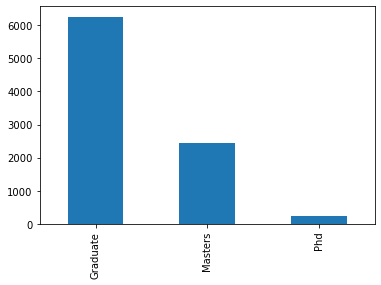

In [11]:
print(df['education_level'].unique())
print(df['education_level'].value_counts())
print(df['education_level'].sample(n = 10))
df['education_level'].value_counts().plot.bar()

### Replace the value of Education level column like ordinal values, "Graduate" -> 0, Masters->1, and Phd -> 2 

In [12]:
df['education_level'] = df['education_level'].map(dict(zip(['Graduate', 'Masters', 'Phd'], list(range(3))))) 

### Show some sample data that the records have changed appropriately

0    6252
1    2449
2     254
Name: education_level, dtype: int64
5752    1
23      0
2452    0
8459    0
6868    1
2561    0
2704    1
6589    0
1940    0
1668    0
Name: education_level, dtype: int64


<AxesSubplot:>

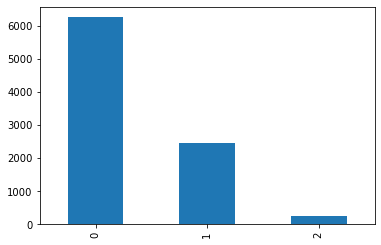

In [13]:
print(df['education_level'].value_counts())
print(df['education_level'].sample(n = 10))
df['education_level'].value_counts().plot.bar()

## company_size column

### Show the unique values of the company_size column

['50-99' '<10' '5000-9999' '1000-4999' '10/49' '100-500' '10000+'
 '500-999']
50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64
5401        50-99
6488        10/49
4973       10000+
5290      100-500
6837          <10
1362      100-500
7474          <10
336       100-500
5541    1000-4999
6791        50-99
Name: company_size, dtype: object


<AxesSubplot:>

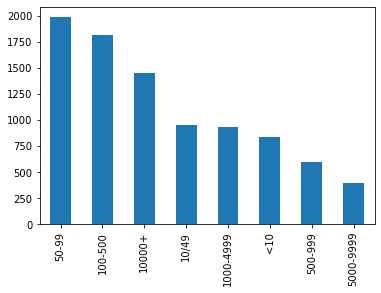

In [14]:
print(df['company_size'].unique())
print(df['company_size'].value_counts())
print(df['company_size'].sample(n = 10))
df['company_size'].value_counts().plot.bar()

### Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable.

In [15]:
df['company_size'] = df['company_size'].map(dict(zip(['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'], list(range(8)))))

### Show the updated unique values

2    1986
3    1814
7    1449
1     951
5     930
0     840
4     592
6     393
Name: company_size, dtype: int64
519     7
2106    5
5370    6
276     7
8549    2
7080    2
486     3
3631    4
5979    2
4433    0
Name: company_size, dtype: int64


<AxesSubplot:>

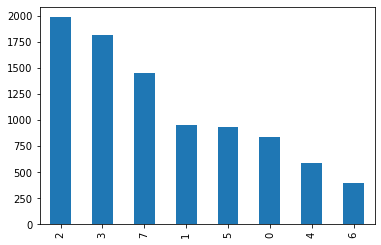

In [16]:
print(df['company_size'].value_counts())
print(df['company_size'].sample(n = 10))
df['company_size'].value_counts().plot.bar()

## Last_new_job:

### Show the unique values of the last_new_job column

['>4' '4' '1' '3' '2' 'never']
1        3838
>4       1965
2        1570
3         610
4         599
never     373
Name: last_new_job, dtype: int64
2521        1
1585       >4
8863        1
3539        2
5703        2
149         1
343         2
1907        2
3165    never
6278        3
Name: last_new_job, dtype: object


<AxesSubplot:>

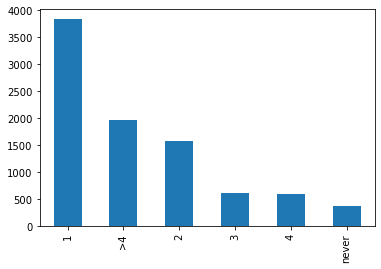

In [17]:
print(df['last_new_job'].unique())
print(df['last_new_job'].value_counts())
print(df['last_new_job'].sample(n = 10))
df['last_new_job'].value_counts().plot.bar()

### Convert the values of this column to never->0, 1->1,....>4 -->5

In [18]:
df['last_new_job'] = df['last_new_job'].map(dict(zip(['never', '1', '2', '3', '4', '>4'], list(range(6)))))

### Show the updated values

1    3838
5    1965
2    1570
3     610
4     599
0     373
Name: last_new_job, dtype: int64
8499    1
799     2
2411    5
5915    5
514     5
4029    5
8943    5
5187    2
5549    2
7343    5
Name: last_new_job, dtype: int64


<AxesSubplot:>

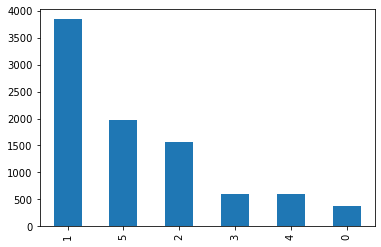

In [19]:
print(df['last_new_job'].value_counts())
print(df['last_new_job'].sample(n = 10))
df['last_new_job'].value_counts().plot.bar()

## Other columns 

### Show the unique values of company_type, major_descipline, enrolled_university, relevant_experience, gender, and updated city column

In [20]:
print(df['company_type'].unique())
print(df['major_discipline'].unique())
print(df['enrolled_university'].unique())
print(df['relevent_experience'].unique())
print(df['gender'].unique())
print(df['city'].unique())

['Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Public Sector' 'NGO'
 'Other']
['STEM' 'Humanities' 'Business Degree' 'Other' 'No Major' 'Arts']
['no_enrollment' 'Part time course' 'Full time course']
['No relevent experience' 'Has relevent experience']
['Male' 'Female' 'Other']
['city_others' 'city_103' 'city_114' 'city_21' 'city_16']


### As one-hot encoding is a bit strict, use panda's get_dummies function to create binary columns for the values of the following columns:

    company_tye
    major_descipline
    enrolled_university
    relevant_eperience
    gender
    updated city column


In [21]:
df = pd.get_dummies(df, columns=['company_type', 'major_discipline', 'enrolled_university', 'relevent_experience', 'gender', 'city'])

### III. SHow the top 5 and last 5 rows to show that the table has changed 

In [22]:
pd.set_option('display.max_columns', None)
print(df)

      Unnamed: 0  enrollee_id  city_development_index  education_level  \
0              1        29725                   0.776                0   
1              4          666                   0.767                1   
2              7          402                   0.762                0   
3              8        27107                   0.920                0   
4             11        23853                   0.920                0   
...          ...          ...                     ...              ...   
8950       19147        21319                   0.624                0   
8951       19149          251                   0.920                1   
8952       19150        32313                   0.920                0   
8953       19152        29754                   0.920                0   
8954       19155        24576                   0.920                0   

      experience  company_size  last_new_job  training_hours  target  \
0           15.0             2         

### IV. Also, show the shape of the table

In [23]:
print(df.shape)

(8955, 34)


## VI. Drop the enrollee_id and any duplicate columns (if you have multiple city column one with actual and one with updated, then remove the actual one)

In [24]:
df = df.drop('enrollee_id', axis =1)

## VII. Feature Scaling:

### I. Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the columns (see documentation on how to use it)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

### II. Show sample records that show some the scaled records

In [26]:
print(df.sample(n=10))

      Unnamed: 0  city_development_index  education_level  experience  \
7841    0.875640                0.351297              0.5    0.190476   
1979    0.214838                0.942116              0.0    1.000000   
3492    0.384254                0.942116              0.0    1.000000   
2055    0.224757                0.774451              0.5    0.285714   
1479    0.161115                0.922156              0.5    0.523810   
6808    0.762399                0.485030              0.0    0.142857   
7290    0.815130                0.351297              0.5    0.380952   
2700    0.295186                0.922156              0.0    1.000000   
4502    0.498382                0.900200              0.0    1.000000   
6521    0.728046                0.942116              0.0    0.666667   

      company_size  last_new_job  training_hours  target  \
7841      0.142857           0.4        0.086567     1.0   
1979      0.142857           0.2        0.277612     0.0   
3492      0.7142

In [27]:
print(df)

      Unnamed: 0  city_development_index  education_level  experience  \
0       0.000000                0.654691              0.0    0.714286   
1       0.000157                0.636727              0.5    1.000000   
2       0.000313                0.626747              0.0    0.619048   
3       0.000365                0.942116              0.0    0.333333   
4       0.000522                0.942116              0.0    0.238095   
...          ...                     ...              ...         ...   
8950    0.999582                0.351297              0.0    0.047619   
8951    0.999687                0.942116              0.5    0.428571   
8952    0.999739                0.942116              0.0    0.476190   
8953    0.999843                0.942116              0.0    0.333333   
8954    1.000000                0.942116              0.0    1.000000   

      company_size  last_new_job  training_hours  target  \
0         0.285714           1.0        0.137313     0.0   
1  

## VIII. Move the target column to the last column of the data frame and show that it has changed

# Maybe make better

In [28]:
df = df.reindex((df.columns[df.columns != 'target']).append(df.columns[df.columns == 'target']), axis=1) 
print(df)

      Unnamed: 0  city_development_index  education_level  experience  \
0       0.000000                0.654691              0.0    0.714286   
1       0.000157                0.636727              0.5    1.000000   
2       0.000313                0.626747              0.0    0.619048   
3       0.000365                0.942116              0.0    0.333333   
4       0.000522                0.942116              0.0    0.238095   
...          ...                     ...              ...         ...   
8950    0.999582                0.351297              0.0    0.047619   
8951    0.999687                0.942116              0.5    0.428571   
8952    0.999739                0.942116              0.0    0.476190   
8953    0.999843                0.942116              0.0    0.333333   
8954    1.000000                0.942116              0.0    1.000000   

      company_size  last_new_job  training_hours  \
0         0.285714           1.0        0.137313   
1         0.285714 

# 3. X/Y and Training/Test Split with stratified sampling and SMOTE

## I. Copy all the features into X and the target to Y

In [29]:
X = df.drop('target', axis=1).values
y = df['target'].values

## II. Show the ratio of 1 and 0 in Y

Ratio of 1: 0.16560580681183695
Ratio of 0: 0.834394193188163


<BarContainer object of 2 artists>

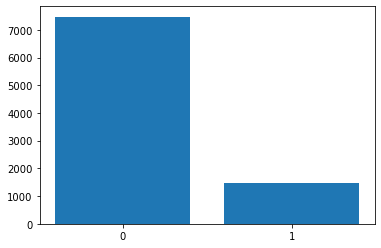

In [30]:
print("Ratio of 1: " + str(np.count_nonzero(y == 1) / y.size))
print("Ratio of 0: " + str(np.count_nonzero(y == 0) / y.size))
plt.bar(['0','1'], [np.count_nonzero(y == 0), np.count_nonzero(y == 1)] )


## III. Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 0. As we want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to the Y.   

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = .3, train_size = .7, random_state = 0, stratify = y)

## IV. Show the ratio of 0 and 1 in y_train and then y_test

y_train: 
Ratio of 1: 0.1656030631780472
Ratio of 0: 0.8343969368219528


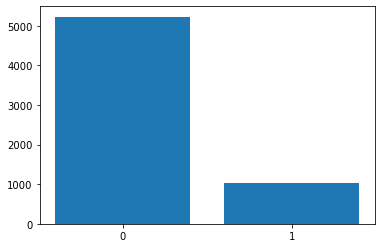


y_test
Ratio of 1: 0.1656122069222181
Ratio of 0: 0.8343877930777819


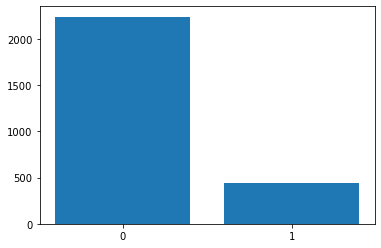

In [32]:
print("y_train: ")
print("Ratio of 1: " + str(np.count_nonzero(y_train == 1) / y_train.size))
print("Ratio of 0: " + str(np.count_nonzero(y_train == 0) / y_train.size))
plt.bar(['0','1'], [np.count_nonzero(y_train == 0), np.count_nonzero(y_train == 1)] )
plt.show()
print("\ny_test")
print("Ratio of 1: " + str(np.count_nonzero(y_test == 1) / y_test.size))
print("Ratio of 0: " + str(np.count_nonzero(y_test == 0) / y_test.size))
plt.bar(['0','1'], [np.count_nonzero(y_test == 0), np.count_nonzero(y_test == 1)] )
plt.show()

## V. Rebalance:

### I. Use imblearn's SMOTE to balance the x_train
# Make sure done properly

In [33]:
from imblearn.over_sampling import SMOTE
X_train_unbalanced = X_train
y_train_unbalanced = y_train
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

## II. Show the ratio of 0 and 1 in Y_train after rebalancing.

y_train: 
Ratio of 1: 0.5
Ratio of 0: 0.5


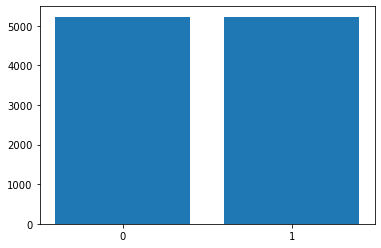

In [34]:
print("y_train: ")
print("Ratio of 1: " + str(np.count_nonzero(y_train == 1) / y_train.size))
print("Ratio of 0: " + str(np.count_nonzero(y_train == 0) / y_train.size))
plt.bar(['0','1'], [np.count_nonzero(y_train == 0), np.count_nonzero(y_train == 1)] )
plt.show()

# PCA and Logistic Regression 

# I have zero clue what is happening here

## I. As we have many features now, we would like to do principal component analysis (you have learned it in datacamp). As part of ti, create pipeline to find how many dimensions give you the best logistic regression model

>1 0.678 (0.012)
>2 0.685 (0.010)
>3 0.689 (0.010)
>4 0.692 (0.011)
>5 0.701 (0.012)
>6 0.703 (0.011)
>7 0.713 (0.012)
>8 0.719 (0.010)
>9 0.720 (0.010)
>10 0.725 (0.011)
>11 0.727 (0.010)
>12 0.726 (0.010)
>13 0.726 (0.010)
>14 0.725 (0.010)
>15 0.724 (0.011)
>16 0.726 (0.011)
>17 0.725 (0.011)
>18 0.724 (0.013)
>19 0.724 (0.011)
>20 0.723 (0.012)
>21 0.728 (0.012)
>22 0.729 (0.012)
>23 0.728 (0.012)
>24 0.728 (0.012)
>25 0.728 (0.012)
>26 0.728 (0.012)
>27 0.728 (0.012)
>28 0.728 (0.012)
>29 0.728 (0.012)
>30 0.728 (0.012)
>31 0.728 (0.012)
>32 0.728 (0.012)


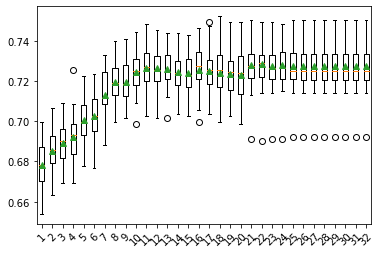

In [35]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# get the dataset
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,33):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

## II. Based on the number of features chosen in the above step, use the test set to evaluate the model for accuracy 

# It says use the test set. I am very confused

In [36]:
steps = [('pca', PCA(n_components=21)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score 
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)


0.7994045403796055

## Show the confusion matrix and interpret the numbers in the confusion matrix 

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[1888,  354],
       [ 185,  260]])

# INTERPERTE

do it

## Show precision, recall, and f1 score

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score: " + str(precision_score(y_test, y_predict)))
print("Recall Score: " + str(recall_score(y_test, y_predict)))
print("F1 Score: " + str(f1_score(y_test, y_predict)))

Precision Score: 0.4234527687296417
Recall Score: 0.5842696629213483
F1 Score: 0.4910292728989613


##  Plot ROC curve and find AUC

In [90]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(model, X_test, y_test, cv=3, method="predict_proba")
#y_scores = model.predict_proba(X_test)
y_scores = y_scores[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

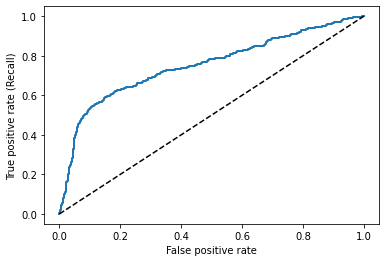

In [91]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
print("AUC Score:", end=' ')
print(roc_auc_score(y_test, y_scores))

AUC Score: 0.7521675069410337


## Plot precision-recall curve for different thresholds and discuss the plot

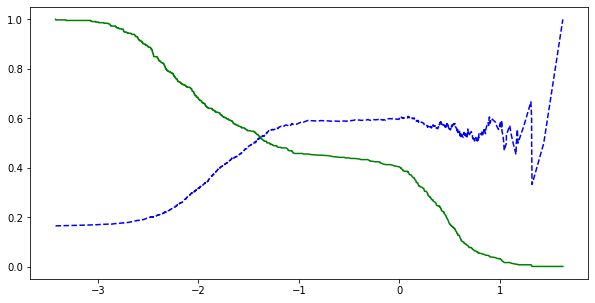

In [42]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    #[...] # highlight the threshold, add the legend, axis label and grid

plt.figure(figsize=(10,5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
#dotted line precision, solid line recall

# 5. Softmaxt regression: 

## I. How softmax regression is related to logistic regression? What library can you use for softmax regression?

# 6. KNN

## I. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the unbalanced training set (the training set before rebalancing) and test it and show the confusion matrix and classification report

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_unbalanced, y_train_unbalanced)

y_neigh_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_neigh_pred))
print(classification_report(y_test, y_neigh_pred))

[[2155   87]
 [ 312  133]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      2242
         1.0       0.60      0.30      0.40       445

    accuracy                           0.85      2687
   macro avg       0.74      0.63      0.66      2687
weighted avg       0.83      0.85      0.83      2687



## II. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the rebalanced training set and test it and show the confusion matrix and classification report

In [44]:
neigh.fit(X_train, y_train)

y_neigh_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_neigh_pred))
print(classification_report(y_test, y_neigh_pred))

[[1685  557]
 [ 172  273]]
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      2242
         1.0       0.33      0.61      0.43       445

    accuracy                           0.73      2687
   macro avg       0.62      0.68      0.63      2687
weighted avg       0.81      0.73      0.76      2687



## III. Use grid search to tune the following hyperparameters of KNN: number of neighbors (between 1 and 20), weights  (uniform or distance), and metrics (Euclidean, Manhattan, or Minkowski)istance) to use for KNN. While creating an instance of GridSearchCV, use multiple evaluation metrics such as AUC and accuracy 

In [45]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    "n_neighbors": range(1, 21),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    #"algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    #"leaf_size": range(1, 50, 5)
}
knn = KNeighborsClassifier()

#grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=-1, cv=cv, scoring="accuracy", refit="AUC", error_score=0, verbose = 3)
grid_results = grid_search.fit(X_train, y_train)


Fitting 30 folds for each of 120 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2240 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2656 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  2.6min finished


## IV The above grid search process can take a couple of minutes. After completing the process, print the best_params_

In [46]:
print(grid_results.best_params_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


## V Based on the result from grid search, use the parameters to train a model, test it with test set, and then print the confusion matrix and classification report. Also, show the AUC of ROC.

In [47]:
knn_final_model = knn.set_params(**grid_results.best_params_)
knn_final_model.fit(X_train, y_train)
y_knn_pred = knn_final_model.predict(X_test)

y_knn_scores = knn_final_model.predict_proba(X_test)
y_knn_scores = y_knn_scores[:,1]
print("AUC: " + str(roc_auc_score(y_test, y_knn_scores)))


#summarize results
print(classification_report(y_test, y_knn_pred))
print(confusion_matrix(y_test, y_knn_pred))

AUC: 0.6354193186260261
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      2242
         1.0       0.35      0.42      0.39       445

    accuracy                           0.78      2687
   macro avg       0.62      0.64      0.62      2687
weighted avg       0.79      0.78      0.78      2687

[[1897  345]
 [ 256  189]]


## VI. Use PCA and based on that train model, test it and then print the confusion matrix and classification report. Also, show the AUC of ROC

In [48]:
steps = [('pca', PCA(n_components=21)), ('m', knn_final_model)]
knn_pipeline = Pipeline(steps=steps)
knn_pipeline.fit(X_train, y_train)
y_pipeline_pred = knn_pipeline.predict(X_test)

y_knn_scores = knn_pipeline.predict_proba(X_test)
y_knn_scores = y_knn_scores[:,1]
print("AUC: " + str(roc_auc_score(y_test, y_knn_scores)))


#summarize results
print(classification_report(y_test, y_pipeline_pred))
print(confusion_matrix(y_test, y_pipeline_pred))

AUC: 0.6446992552796961
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      2242
         1.0       0.35      0.46      0.40       445

    accuracy                           0.77      2687
   macro avg       0.62      0.64      0.63      2687
weighted avg       0.80      0.77      0.78      2687

[[1858  384]
 [ 240  205]]


## VII. A short discussion on the 4 models and their differences.

DO IT

# 7. Naive Bayes

## I. Train a model with GaussianNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

AUC: 0.7293117100502161
[[1072 1170]
 [ 107  338]]
              precision    recall  f1-score   support

         0.0       0.91      0.48      0.63      2242
         1.0       0.22      0.76      0.35       445

    accuracy                           0.52      2687
   macro avg       0.57      0.62      0.49      2687
weighted avg       0.80      0.52      0.58      2687

GaussianNB
Misclassified samples: 1277
Accuracy: 0.52


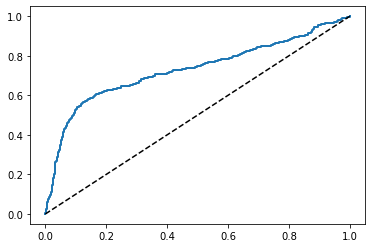

In [49]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)
y_gnb_pred_prob = gnb.predict_proba(X_test)
y_gnb_scores = y_gnb_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_gnb_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_gnb_scores)))

print(confusion_matrix(y_test, y_gnb_pred))
print(classification_report(y_test, y_gnb_pred))

# how did our model perform?
count_misclassified = (y_test != y_gnb_pred).sum()

print("GaussianNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_gnb_pred)
print('Accuracy: {:.2f}'.format(accuracy))

## II. Train a model with CategoricalNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve, and show the AUC of ROC and the count of the number of misclassification.

AUC: 0.7293117100502161
[[1897  345]
 [ 204  241]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      2242
         1.0       0.41      0.54      0.47       445

    accuracy                           0.80      2687
   macro avg       0.66      0.69      0.67      2687
weighted avg       0.82      0.80      0.81      2687

CategoricalNB
Misclassified samples: 549
Accuracy: 0.80


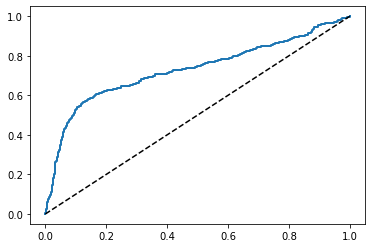

In [50]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_cnb_pred = cnb.predict(X_test)
y_cnb_scores = cnb.predict_proba(X_test)
y_cnb_pred_prob = cnb.predict_proba(X_test)
y_cnb_scores = y_gnb_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_cnb_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_cnb_scores)))

from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_cnb_pred))
print(classification_report(y_test, y_cnb_pred))

# how did our model perform?
count_misclassified = (y_test != y_cnb_pred).sum()

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_cnb_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# 8. Support Vector Machine  

## I. Build a support vector machine model using SVC. Use grid search to tune some parameters and then based on that show the best parameters found

In [51]:
from sklearn.svm import SVC

svc_params = {
    "C": [0.1,1,10,100, 1000],
    "gamma": [1,0.1,0.01,0.001,0.0001],
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}
svc = SVC()

#grid search
svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_params, n_jobs=-1, cv=3, refit=True, scoring="accuracy", verbose = 3)
svc_grid_results = svc_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 253.8min finished


In [102]:
print(svc_grid_results.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
<function _passthrough_scorer at 0x7f4286bcfca0>


## 2. Test the model and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

AUC: 0.6434639016127254
[[1901  341]
 [ 270  175]]
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      2242
         1.0       0.34      0.39      0.36       445

    accuracy                           0.77      2687
   macro avg       0.61      0.62      0.61      2687
weighted avg       0.79      0.77      0.78      2687

SVC
Misclassified samples: 611
Accuracy: 0.77


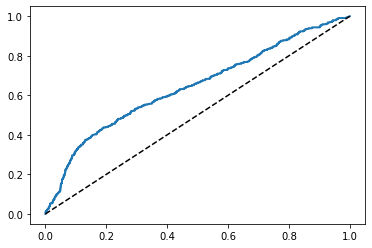

In [58]:
svc = SVC(probability=True, C=1000, gamma=1, kernel='rbf')
svc.fit(X_train, y_train)
y_svc_pred_prob = svc.predict_proba(X_test)
y_svc_pred = svc_grid_results.predict(X_test)
y_svc_scores = y_svc_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_svc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_svc_scores)))

print(confusion_matrix(y_test, y_svc_pred))
print(classification_report(y_test, y_svc_pred))

# how did our model perform?
count_misclassified = (y_test != y_svc_pred).sum()

print("SVC")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_svc_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# 9. Decision Tree

## 1. Build a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set, entropy as the criterion. Try with different max_depth (or use grid search). After building model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification. Show the decision tree. (you can simply import tree from sklearn and call tree.plot_tree with your model and the call plt.show. At the beginning of this process, use plt.figure to change the figsize

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc_params = {
    "criterion": ["entropy"],
    "max_depth": range(1, 33)
}

dtc = DecisionTreeClassifier()
#grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dtc_grid_search = GridSearchCV(estimator=dtc, param_grid=dtc_params, n_jobs=-1, cv=cv, refit=True, scoring='accuracy', verbose =3)
dtc_grid_results = dtc_grid_search.fit(X_train_unbalanced, y_train_unbalanced)


print(dtc_grid_results.best_params_)
print(dtc_grid_results.scorer_)

Fitting 30 folds for each of 32 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:    2.3s


{'criterion': 'entropy', 'max_depth': 3}
make_scorer(accuracy_score)


[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    2.5s finished


AUC: 0.7398620814080525
[[2090  152]
 [ 224  221]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2242
         1.0       0.59      0.50      0.54       445

    accuracy                           0.86      2687
   macro avg       0.75      0.71      0.73      2687
weighted avg       0.85      0.86      0.86      2687

Decision Tree Classifier Unbalanced
Misclassified samples: 376
Accuracy: 0.86


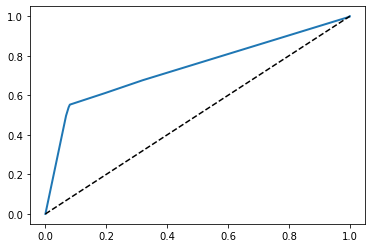

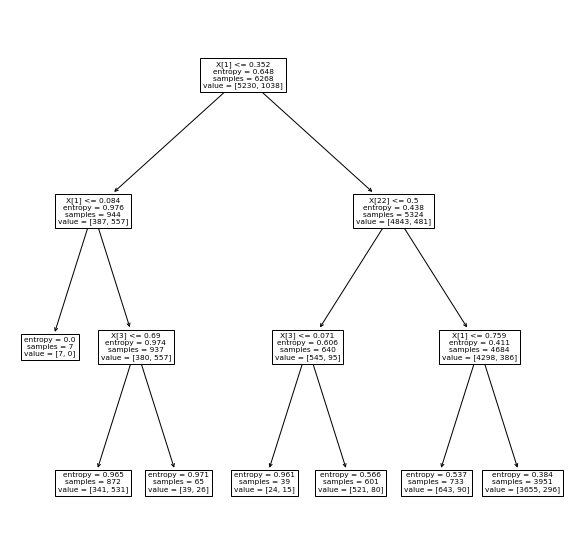

In [80]:
from sklearn.tree import plot_tree
y_dtc_pred_prob = dtc_grid_results.predict_proba(X_test)
y_dtc_pred = dtc_grid_results.predict(X_test)
y_dtc_scores = y_dtc_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_dtc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_dtc_scores)))

print(confusion_matrix(y_test, y_dtc_pred))
print(classification_report(y_test, y_dtc_pred))

# how did our model perform?
count_misclassified = (y_test != y_dtc_pred).sum()

print("Decision Tree Classifier Unbalanced")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_dtc_pred)
print('Accuracy: {:.2f}'.format(accuracy))
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
dtc.fit(X_train_unbalanced, y_train_unbalanced)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

## 2. Perform the same tasks as 9.1 with the balanced training set

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc_params = {
    "criterion": ["entropy"],
    "max_depth": range(1, 33)
}

dtc = DecisionTreeClassifier()
#grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dtc_grid_search = GridSearchCV(estimator=dtc, param_grid=dtc_params, n_jobs=-1, cv=cv, refit=True, verbose =3)
dtc_grid_results = dtc_grid_search.fit(X_train, y_train)


print(dtc_grid_results.best_params_)

Fitting 30 folds for each of 32 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.0s


{'criterion': 'entropy', 'max_depth': 18}


[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    5.1s finished


AUC: 0.6398645871964238
[[1943  299]
 [ 251  194]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      2242
         1.0       0.39      0.44      0.41       445

    accuracy                           0.80      2687
   macro avg       0.64      0.65      0.64      2687
weighted avg       0.80      0.80      0.80      2687

Decision Tree Classifier Unbalanced
Misclassified samples: 550
Accuracy: 0.80


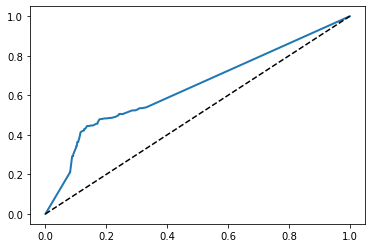

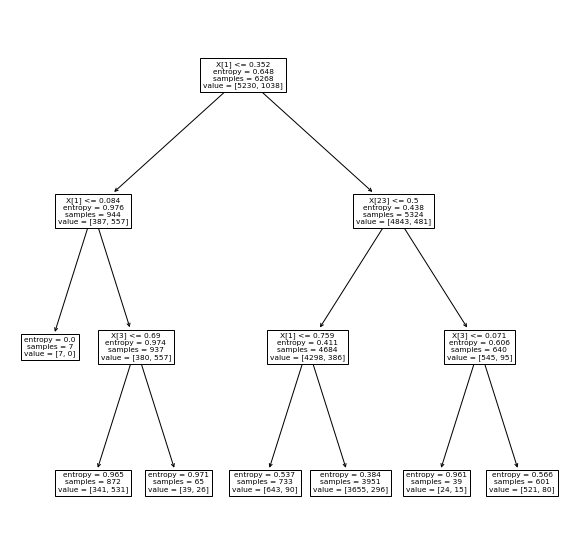

In [77]:
y_dtc_pred_prob = dtc_grid_results.predict_proba(X_test)
y_dtc_pred = dtc_grid_results.predict(X_test)
y_dtc_scores = y_dtc_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_dtc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_dtc_scores)))

print(confusion_matrix(y_test, y_dtc_pred))
print(classification_report(y_test, y_dtc_pred))

# how did our model perform?
count_misclassified = (y_test != y_dtc_pred).sum()

print("Decision Tree Classifier Unbalanced")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_dtc_pred)
print('Accuracy: {:.2f}'.format(accuracy))
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
dtc.fit(X_train_unbalanced, y_train_unbalanced)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

## 3. Discuss any difference and also discuss part of the tree of 9.2


# 10 .Random Forest

## 1. Use grid search to tune the max_depth, min_samples_leaf, and n_estimators  (helpful link:https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) [it may take about 5 minutes

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc_params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
#grid search
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_params, n_jobs=-1, cv=4, refit=True, scoring = "accuracy", verbose =3)
rfc_grid_results = rfc_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   23.7s finished


## 2. Print the best estimator

In [86]:
print(rfc_grid_results.best_params_)

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}


## 3. Train the model. After building the model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [99]:
## Model already trained)
#y_scores = cross_val_predict(rfc, X_test, y_test, cv=3, method="predict_proba")
y_rfc_pred_prob = rfc_grid_results.predict_proba(X_test)
y_rfc_pred = rfc_grid_results.predict(X_test)
y_rfc_scores = y_rfc_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_rfc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_rfc_scores)))

print(confusion_matrix(y_test, y_rfc_pred))
print(classification_report(y_test, y_rfc_pred))

make_scorer(accuracy_score)


ValueError: n_estimators must be an integer, got <class 'dict'>.

# 11. Boosting Algorithms

# 12. Finally, briefly discuss your finding such as which model could be most suitable for this given scenario and what could be your future work based on this experiment.